In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.io import ascii
import numpy as np

psfFile = '../PSFstars.txt'
psf = ascii.read(psfFile)
scaleFile = '../PSFstars-scale.txt'
scale = ascii.read(scaleFile)

fitsImage = 'NGC_4567_Light_Luminance_120_secs_007_c-WCS.fit'
#fitsImage = '/home/boutigny/Images Astro/CFHT/1698812p.fits'
hduList = fits.open(fitsImage)
data = hduList[0].data

In [61]:
scale

col1,col2,col3,col4
float64,float64,float64,float64
100.0,100.0,55.731,99.754


In [62]:
psf

Id,St,X,Y,sx,sy,theta,s,FWHMx,FWHMy
int64,int64,float64,float64,float64,float64,float64,float64,float64,float64
0,1,968.04,7.164,2.912,1.731,179.046,3.388,2.196,1.305
1,1,1326.19,21.008,2.208,1.91,90.66,2.919,1.893,1.638
2,1,1375.779,42.708,2.044,1.692,95.987,2.653,1.991,1.649
3,1,290.136,45.552,2.639,2.052,107.841,3.343,2.236,1.739
4,1,1341.874,45.403,2.424,2.144,145.412,3.236,2.51,2.22
5,1,108.45,46.58,2.242,1.745,159.453,2.841,2.051,1.596
6,1,475.323,66.658,3.019,2.362,105.184,3.833,2.219,1.737
7,1,263.991,72.424,0.621,0.445,170.683,0.764,1.136,0.814
8,1,1103.277,91.941,2.838,2.413,90.421,3.726,2.022,1.719


In [63]:
#plateScale = 0.187
plateScale = 1.33
print('Taille médiane des étoiles: %.2f %.2f %.2f arcsec'%(np.median(psf['s'])*plateScale, 
       np.median(psf['FWHMx'])*plateScale, np.median(psf['FWHMy'])*plateScale))

Taille médiane des étoiles: 4.80 3.01 2.27 arcsec


In [64]:
nX = 1382
nY = 1039 
dilat = 50
cut = psf['s']<4
r = psf['sy'][cut]/psf['sx'][cut]
U = (dilat/r)*np.cos(np.deg2rad(psf['theta'][cut]))
V = (dilat/r)*np.sin(np.deg2rad(psf['theta'][cut]))
#print(U, V)

In [65]:
print(psf['X'][cut][0], psf['Y'][cut][0], U[0], V[0])

968.04 7.164 -84.10156995899669 1.4004576560337214


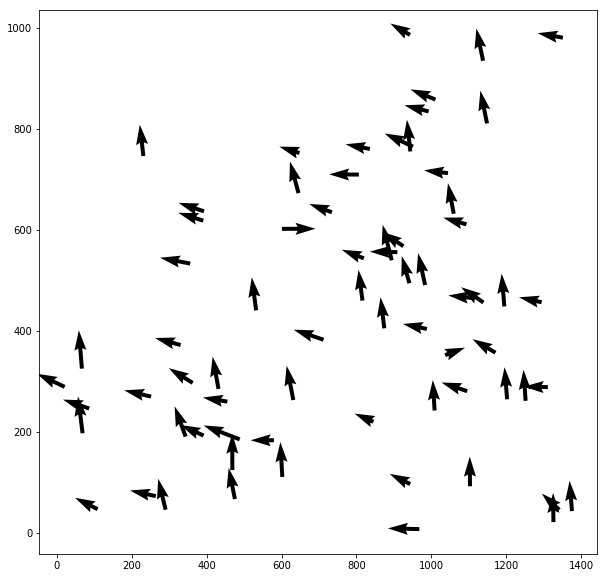

In [66]:
plt.figure(figsize=(10,10))
plt.quiver(psf['X'][cut], psf['Y'][cut], U, V, angles='xy', scale_units='xy', scale=1.)

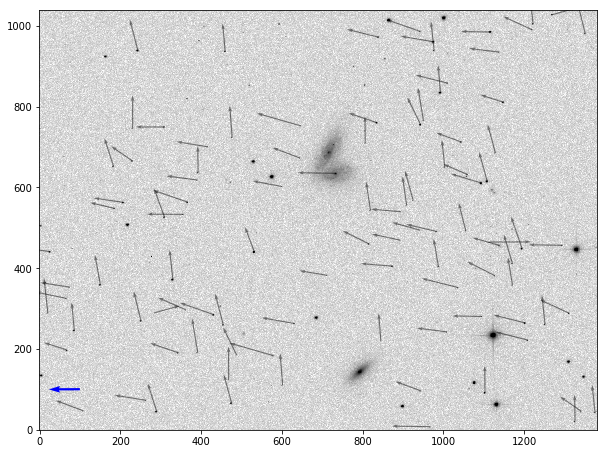

In [67]:
from astropy.visualization import AsinhStretch
from astropy.visualization.mpl_normalize import ImageNormalize

vMin = 0.025
vMax = 0.2
st = 0.01     
plt.figure(figsize=(10,10))
norm = ImageNormalize(vmin=vMin, vmax=vMax, stretch=AsinhStretch(st))

plt.imshow(data, cmap='Greys', origin='lower', norm=norm)
plt.quiver(psf['X'], psf['Y'], U, V, angles='uv', width=0.002,  alpha=0.5)
plt.quiver(scale[0]['col1'], scale[0]['col2'], scale[0]['col3']-scale[0]['col1'], 
           scale[0]['col4']-scale[0]['col2'], 
           angles='uv', width=0.004, alpha=1, color='blue')

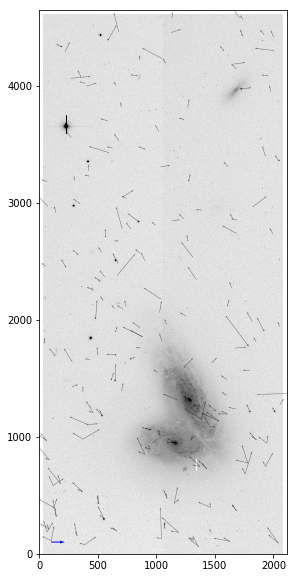

In [49]:
from astropy.visualization import AsinhStretch
from astropy.visualization.mpl_normalize import ImageNormalize

vMin = 2880
vMax = 40000
st = 0.01     
plt.figure(figsize=(10,10))
norm = ImageNormalize(vmin=vMin, vmax=vMax, stretch=AsinhStretch(st))

plt.imshow(data, cmap='Greys', origin='lower', norm=norm)
plt.quiver(psf['X'], psf['Y'], U, V, angles='uv', width=0.002,  alpha=0.5)
plt.quiver(scale[0]['col1'], scale[0]['col2'], scale[0]['col3']-scale[0]['col1'], 
           scale[0]['col4']-scale[0]['col2'], 
           angles='uv', width=0.004, alpha=1, color='blue')